OP13

Assume data is in a file called OP13test-data.csv with columns wavelength (called wave), and three readings called 'reading1', 'reading2' and 'reading3'

In [21]:
import pandas as pd
df = pd.read_csv("OP13_data.csv")

In [22]:
df.describe()

,wave,reading1,reading2,reading3
count,21.000000,21.000000,21.000000,21.000000
mean,5321.733333,26.416190,26.412857,26.411905
std,884.117533,4.364764,4.358895,4.359347
min,4047.700000,20.110000,20.110000,20.110000
25%,4359.500000,21.670000,21.670000,21.670000
50%,5462.200000,27.110000,27.110000,27.110000
75%,5891.600000,29.220000,29.230000,29.230000
max,6909.400000,34.250000,34.210000,34.220000


In [23]:
wave = df.wave.values

Read in the three readings then find an average

In [24]:
read1 = df.reading1.values
read2 = df.reading2.values
read3 = df.reading3.values
average=(read1+read2+read3)/3
average

array([20.11      , 20.28      , 20.42666667, 21.56333333, 21.62      ,
       21.67      , 24.43      , 24.63666667, 24.98      , 25.05      ,
       27.11      , 28.17666667, 28.64      , 28.74      , 29.08      ,
       29.22666667, 30.13      , 30.37666667, 30.92666667, 33.28666667,
       34.22666667])

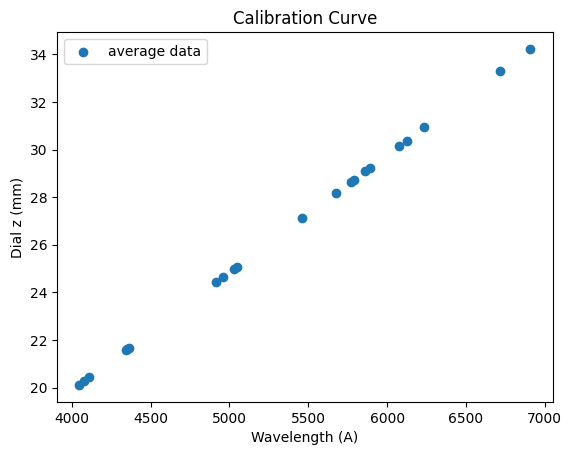

In [25]:
import matplotlib.pyplot as plt

plt.scatter(wave,average, label='average data')
plt.xlabel('Wavelength (A)')
plt.ylabel('Dial z (mm)')
plt.title('Calibration Curve')
plt.legend();
plt.savefig('Calibration.png')
plt.show()

m: 4.933e-03
c: 1.638e-01
Errors on m: 2.615e-06
Errors on c: 1.410e-02
t value on m: 1.886e+03
t value on c: 1.162e+01


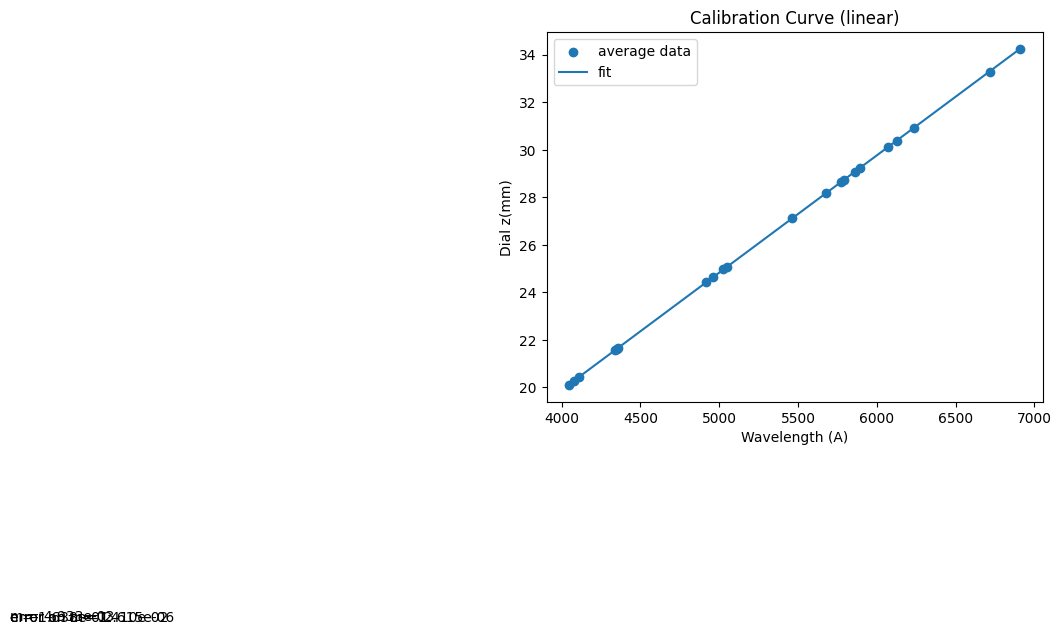

In [26]:
#Calculate Linear fit

from scipy.optimize import curve_fit

def linear_fit(wave, m, c):  # define the equation of the fit
    return m*wave+c

parameters, covariant_matrix = curve_fit(linear_fit, wave, average, p0=(1, 1)) # this line contains the initial fit guesses
m_fitted = parameters[0] #m is parameter #0
c_fitted = parameters[1] #c is parameter #1

#Print out the fitted values to 3 dp
print('m: {:.3e}'.format(m_fitted))
print('c: {:.3e}'.format(c_fitted))

# Find the uncertainties in the fit from the diagonal elements of the covariant matrix
import numpy as np
parameter_uncertainties = np.sqrt(covariant_matrix.diagonal())
m_err_fitted = parameter_uncertainties[0]
c_err_fitted = parameter_uncertainties[1]

#Print out the fitted values to 3 dp
print('Errors on m: {:.3e}'.format(m_err_fitted))
print('Errors on c: {:.3e}'.format(c_err_fitted))

# Print out the t values
print('t value on m: {:.3e}'.format(m_fitted/m_err_fitted))
print('t value on c: {:.3e}'.format(c_fitted/c_err_fitted))

fit_lin = m_fitted*wave+c_fitted
plt.scatter(wave,average, label='average data')
plt.plot(wave, fit_lin, label='fit')
    #Print out fit values on graph, first two numbers are x,y coordinates, rest turns a floating point number into string with 3 dp
plt.text(499,10.17,str('m = ')+"{:.3e}".format(m_fitted))
plt.text(499,10.16,str('error on m = ')+"{:.3e}".format(m_err_fitted)) 
plt.text(499,10.14,str('c = ')+"{:.3e}".format(c_fitted)) 
plt.text(499,10.13,str('error on c = ')+"{:.3e}".format(c_err_fitted))
plt.xlabel('Wavelength (A)')
plt.ylabel('Dial z(mm)')
plt.title('Calibration Curve (linear)')
plt.legend();
plt.savefig('Calibration Curve fitted (linear).png')
plt.show()

Calculate and plot residuals

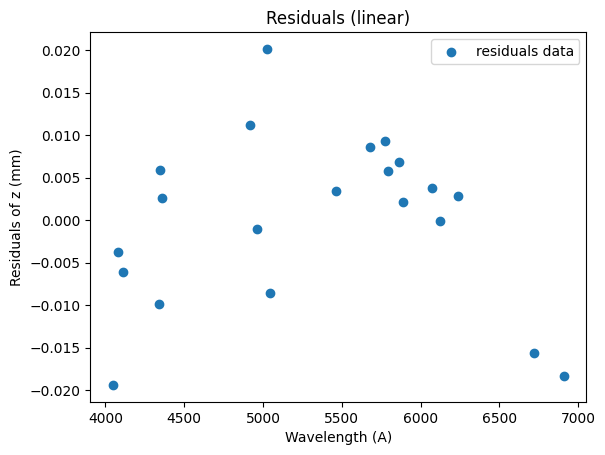

In [27]:
residuals_linear=average-fit_lin
plt.scatter(wave,residuals_linear, label='residuals data')
plt.xlabel('Wavelength (A)')
plt.ylabel('Residuals of z (mm)')
plt.title('Residuals (linear)')
plt.legend();
plt.savefig('Residuals (linear).png')
plt.show()

a: -1.082e-08
b: 5.048e-03
c: -1.359e-01
Errors on a: 2.143e-09
Errors on b: 2.292e-05
Errors on c: 6.006e-02
t value on a: -5.051e+00
t value on b: 2.203e+02
t value on c: -2.264e+00


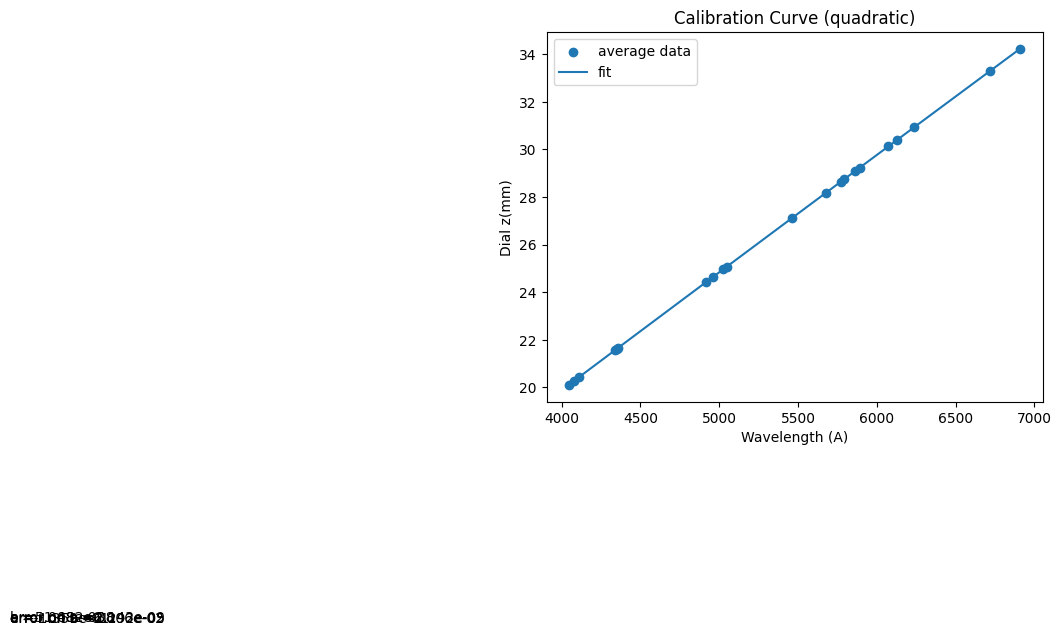

In [28]:
#Calculate Quadratic fit

from scipy.optimize import curve_fit

def quadratic_fit(wave, a, b,c):  # define the equation of the fit
    return a*wave**2 + b*wave +c

parameters2, covariant_matrix2 = curve_fit(quadratic_fit, wave, average, p0=(1,1,1)) # this line contains the initial fit guesses
a_fitted = parameters2[0] #a is parameter #0
b_fitted = parameters2[1] #b is parameter #1
c_fitted = parameters2[2] #c is parameter #2

#Print out the fitted values to 3 dp
print('a: {:.3e}'.format(a_fitted))
print('b: {:.3e}'.format(b_fitted))
print('c: {:.3e}'.format(c_fitted))

# Find the uncertainties in the fit from the diagonal elements of the covariant matrix
import numpy as np
parameter_uncertainties2 = np.sqrt(covariant_matrix2.diagonal())
a_err_fitted = parameter_uncertainties2[0]
b_err_fitted = parameter_uncertainties2[1]
c_err_fitted = parameter_uncertainties2[2]

#Print out the fitted values to 3 dp
print('Errors on a: {:.3e}'.format(a_err_fitted))
print('Errors on b: {:.3e}'.format(b_err_fitted))
print('Errors on c: {:.3e}'.format(c_err_fitted))

# Print out the t values
print('t value on a: {:.3e}'.format(a_fitted/a_err_fitted))
print('t value on b: {:.3e}'.format(b_fitted/b_err_fitted))
print('t value on c: {:.3e}'.format(c_fitted/c_err_fitted))

fit_quad = a_fitted*wave**2+b_fitted*wave+c_fitted
plt.scatter(wave,average, label='average data')
plt.plot(wave, fit_quad, label='fit')
#Print out fit values on graph, first two numbers are x,y coordinates, rest turns a floating point number into string with 3 dp
plt.text(499,10.17,str('a = ')+"{:.3e}".format(a_fitted))
plt.text(499,10.16,str('error on a =')+"{:.3e}".format(a_err_fitted)) 
plt.text(499,10.14,str('b =')+"{:.3e}".format(b_fitted)) 
plt.text(499,10.13,str('error on b =')+"{:.3e}".format(b_err_fitted))
plt.text(499,10.11,str('c =')+"{:.3e}".format(c_fitted)) 
plt.text(499, 10.10,str('error on c =')+"{:.3e}".format(c_err_fitted))
plt.xlabel('Wavelength (A)')
plt.ylabel('Dial z(mm)')
plt.title('Calibration Curve (quadratic)')
plt.legend();
plt.savefig('Calibrations Curve fitted (quadratic).png')
plt.show()

Calculate and plot residuals

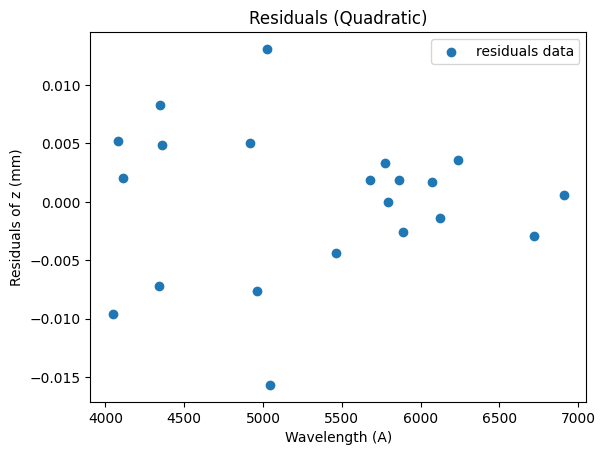

In [29]:
residuals_quadratic=average-fit_quad
plt.scatter(wave,residuals_quadratic, label='residuals data')
plt.xlabel('Wavelength (A)')
plt.ylabel('Residuals of z (mm)')
plt.title('Residuals (Quadratic)')
plt.legend();
plt.savefig('Residuals (Quadratic).png')
plt.show()

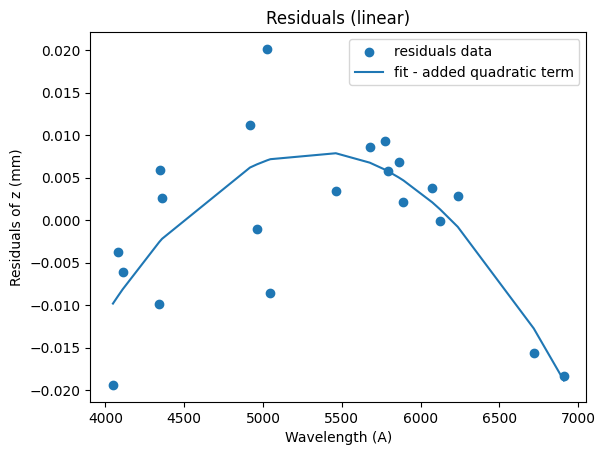

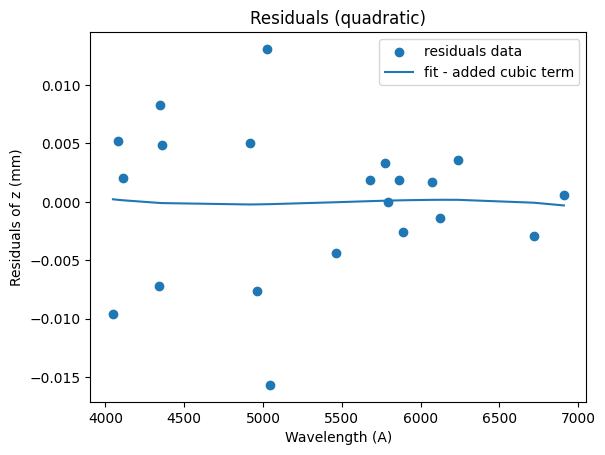

In [30]:
#Calculate fit on both sets of residuals
#Linear fit
parameters_res_lin, covariant_matrix_res_lin = curve_fit(quadratic_fit, wave, residuals_linear, p0=(1,1,1)) # this line contains the initial fit guesses
a_res_lin_fitted = parameters_res_lin[0] #a is parameter #0
b_res_lin_fitted = parameters_res_lin[1] #b is parameter #1
c_res_lin_fitted = parameters_res_lin[2] #c is parameter #2

fit_res_lin=a_res_lin_fitted*wave**2+b_res_lin_fitted*wave+c_res_lin_fitted

plt.scatter(wave,residuals_linear, label='residuals data')
plt.plot(wave, fit_res_lin, label='fit - added quadratic term')
plt.xlabel('Wavelength (A)')
plt.ylabel('Residuals of z (mm)')
plt.title('Residuals (linear)')
plt.legend();
plt.savefig('Residuals (linear).png')
plt.show()


#Quadratic fit
def cubic_fit(wave, a, b, c, d):  # define the equation of the fit
    return a*wave**3 + b*wave**2 + c*wave + d
parameters_res_quad, covariant_matrix_quad = curve_fit(cubic_fit, wave, residuals_quadratic, p0=(1,1,1,1)) # this line contains the initial fit guesses
a_res_quad_fitted = parameters_res_quad[0] #a is parameter #0
b_res_quad_fitted = parameters_res_quad[1] #b is parameter #1
c_res_quad_fitted = parameters_res_quad[2] #c is parameter #2
d_res_quad_fitted = parameters_res_quad[3] #d is parameter #3

fit_res_quad=a_res_quad_fitted*wave**3+b_res_quad_fitted*wave**2+c_res_quad_fitted*wave+d_res_quad_fitted

plt.scatter(wave,residuals_quadratic, label='residuals data')
plt.plot(wave, fit_res_quad, label='fit - added cubic term')
plt.xlabel('Wavelength (A)')
plt.ylabel('Residuals of z (mm)')
plt.title('Residuals (quadratic)')
plt.legend();
plt.savefig('Residuals (quadratic).png')
plt.show()


Written September 2019 by Jenny Barnes and Mathias Tecza